*First compiled: June 19, 2017.*

# Graph abstraction for minimal examples

In [2]:
import numpy as np
from matplotlib import rcParams
import matplotlib.pyplot as pl
import scanpy.api as sc
sc.settings.verbosity = 2                          # verbosity: 0=errors, 1=warnings, 2=info, 3=hints, ...
sc.settings.set_figure_params(dpi=80)              # dots (pixels) per inch determine size of inline figures
sc.logging.print_version_and_date()

Running Scanpy version 0.2.8+15.gfc4c1f4.dirty on 2017-09-18 23:12.


The notebooks contains the following sections.
* Section 1: [Simulated data for myeloid progenitor development](#data1)  
* Section 2: [Simulated data for different degrees of clustering](#data2)

## Simulated data for myeloid progenitor development <a id="data1"></a>

The simulated data describes development from a progenitor cell to four differentiated cell types: monocyte, erythrocyte, megacaryocyte and neutrophil.

See [Krumsiek *et al.* (2009)](https://doi.org/10.1371/journal.pone.0022649) for the definition of the boolean literature-curated network underlying the simulation and discussion of marker genes. The data has been generated using `sc.tl.sim('krumsiek11')`; see [here](https://github.com/theislab/scanpy_usage/tree/master/170430_krumsiek11) for more details. We add some clusters to the data, sampled from a Gaussian mixed model.

In [11]:
adata_krumsiek11 = sc.examples.krumsiek11()
X_blobs = sc.examples.blobs(cluster_std=0.5, n_centers=2).X
X_concatenated = np.r_[adata_krumsiek11.X, X_blobs]
adata = sc.AnnData(X_concatenated)
adata.var_names = adata_krumsiek11.var_names
adata.add = adata_krumsiek11.add

### Visualization

In [ ]:
sc.tl.tsne(adata)
sc.tl.draw_graph(adata)
sc.write('krumsiek11_blobs', adata)

reading file ./write/krumsiek11_blobs.h5
... saving figure to file ./figures/tsne.png


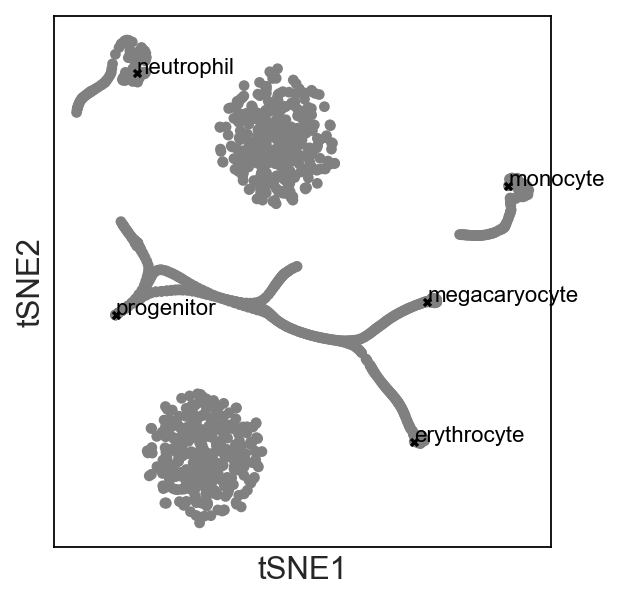

In [6]:
adata = sc.read('krumsiek11_blobs')
ax = sc.pl.tsne(adata, save=True, show=True)

... saving figure to file ./figures/draw_graph_fr.png


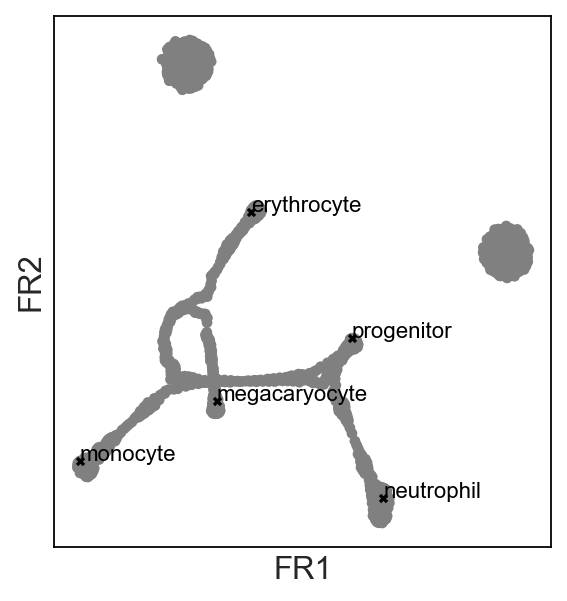

In [5]:
ax = sc.pl.draw_graph(adata, save=True, show=True)

In [15]:
sc.write('krumsiek11_blobs', adata)

### Construct the abstracted graph

In [3]:
adata = sc.read('krumsiek11_blobs')
sc.tl.aga(adata, resolution=2.5)

reading file ./write/krumsiek11_blobs.h5
running Louvain clustering
    using data matrix X directly for building graph (no PCA)
    using stored data graph with n_neighbors = 30 and spectrum
    [ 1.            1.            1.            0.998418808   0.9969582558
      0.9920811653  0.9909049273  0.9824624062  0.9651805162  0.9614249468]
    using the "louvain" package of Traag (2017)
    finished (0:00:00.412) and found 13 clusters, added
    "louvain_groups", the cluster labels (adata.smp)
    "louvain_groups_order", the unique cluster labels (adata.add)
running Approximate Graph Abstraction (AGA)
    using data matrix X directly for building graph (no PCA)
    using stored data graph with n_neighbors = 30 and spectrum
    [ 1.            1.            1.            0.998418808   0.9969582558
      0.9920811653  0.9909049273  0.9824624062  0.9651805162  0.9614249468]
    abstracted graph will have 13 nodes
... finished (0:00:00.334)


... you are using a very low resolution for saving figures, adjusting to dpi=300
... saving figure to file ./figures/aga.png


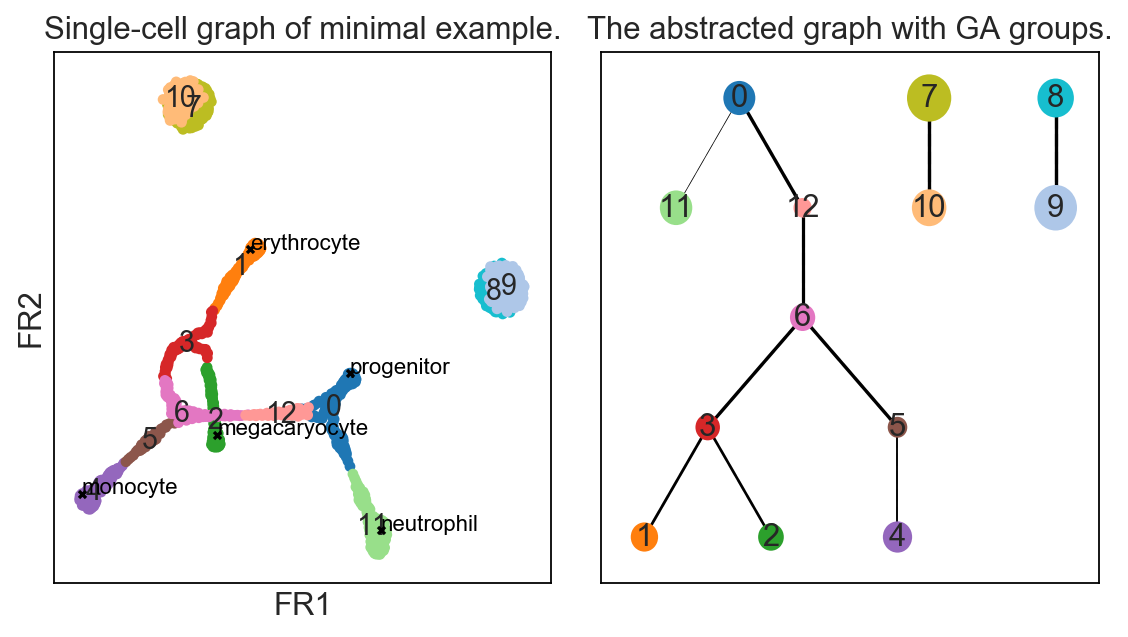

In [4]:
axs = sc.pl.aga(adata, basis='draw_graph_fr', color='aga_groups', groups_graph='aga_groups',
                title='Single-cell graph of minimal example.', save=True, show=True,
                root=[0, 7, 8], layout='rt', frameon=True,
                title_graph='The abstracted graph with GA groups.')

In [5]:
sc.write('krumsiek11_blobs', adata)

writing ./write/krumsiek11_blobs.h5


Export this for external reusage.

In [ ]:
sc.write('krumsiek11_blobs', adata, ext='csv')

### Gene dynamics along paths

reading file ./write/krumsiek11_blobs.h5


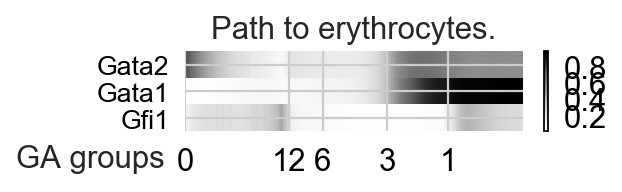

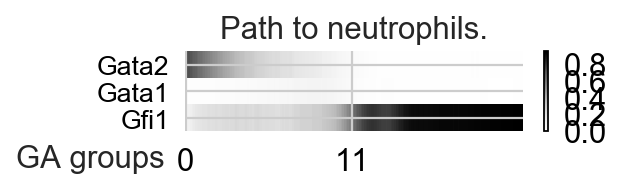

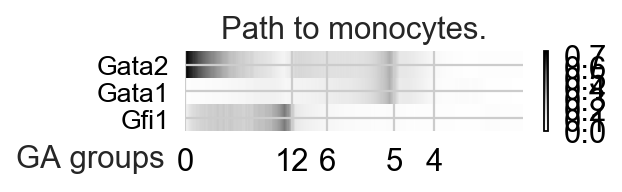

In [23]:
adata = sc.read('krumsiek11_blobs')
paths = [('erythrocytes', [0, 12, 6, 3, 1]),
         ('neutrophils', [0, 11]),
         ('monocytes', [0, 12, 6, 5, 4])]
rcParams['figure.figsize'] = (4, 1)
rcParams['figure.subplot.top'] = 0.75
rcParams['figure.subplot.bottom'] = 0.25
for ipath, (descr, path) in enumerate(paths):
    ax = sc.pl.aga_path(adata, left_margin=0.3,
                        nodes=path,
                        keys=['Gata2', 'Gata1', 'Gfi1'],
                        n_avg=10,
                        ytick_fontsize=12,
                        title='Path to {}.'.format(descr),
                        show=False)
    ax.text(-0.5, -0.45, 'GA groups', transform=ax.transAxes)
    ax.set_xlabel('')
    pl.savefig('./figures/aga_path_{}.png'.format(descr))
    pl.show()    
sc.pl.reset_rcParams()

## Simulated data for different degrees of clustering <a id="data2"></a>

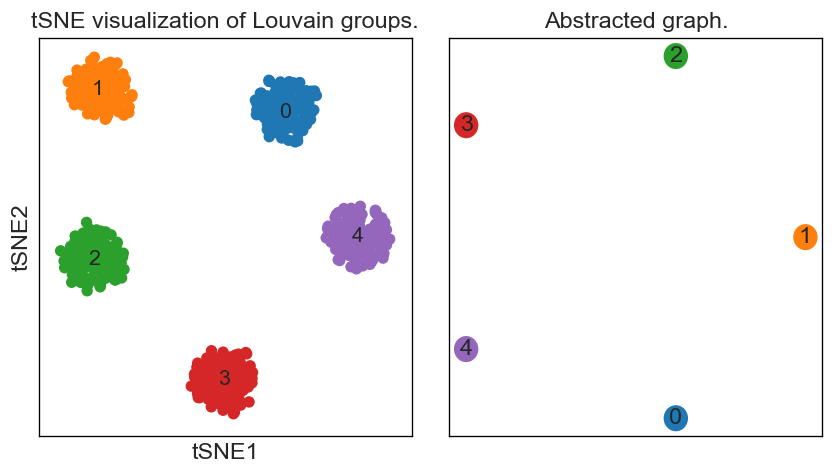

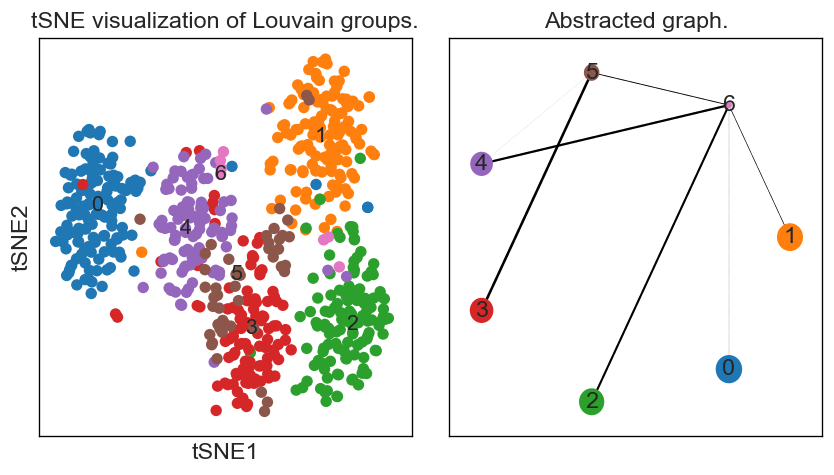

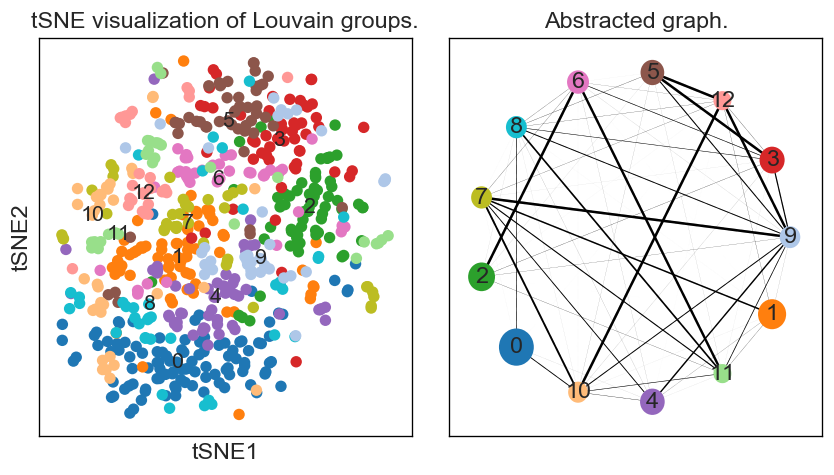

In [8]:
sc.settings.verbosity = 1
sc.settings.set_dpi(60)
for std in [1, 6, 10]:
    adata = sc.examples.blobs(cluster_std=std, n_centers=5)
    sc.tl.tsne(adata)
    sc.tl.aga(adata, n_neighbors=5, tree_based_confidence=False)
    sc.pl.aga(adata, solid_edges='aga_adjacency_full_confidence', layout='circle', frameon=True,
              title='tSNE visualization of Louvain groups.',
              title_graph='Abstracted graph.',
              save='_cluster_std{}'.format(std), show=True)